In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load datasets

In [3]:
benin_df = pd.read_csv('data/benin-malanville.csv')
sl_df = pd.read_csv('data/sierraleone-bumbuna.csv')
tg_df = pd.read_csv('data/togo-dapaong_qc.csv')

## Display first rows

In [4]:
print("Benin Data:")
print(benin_df.head())
print("\nSierra Leone Data:")
print(sl_df.head())
print("\nTogo Data:")
print(tg_df.head())

Benin Data:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

Sierra 

## Check data types and missing values

In [5]:
print("\nBenin Info:")
print(benin_df.info())
print("\nSierra Leone Info:")
print(sl_df.info())
print("\nTogo Info:")
print(tg_df.info())


Benin Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          5

## Summary statistics

In [6]:
print("\nBenin Summary:")
print(benin_df.describe())
print("\nSierra Leone Summary:")
print(sl_df.describe())
print("\nTogo Summary:")
print(tg_df.describe())


Benin Summary:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000

## Check missing values

In [7]:
print("Benin Missing Values:")
print(benin_df.isnull().sum())
print("\nSierra Leone Missing Values:")
print(sl_df.isnull().sum())
print("\nTogo Missing Values:")
print(tg_df.isnull().sum())

Benin Missing Values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Sierra Leone Missing Values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Togo Miss

## Check for negative irradiance values (potential outliers)

In [8]:
key_columns = ['GHI', 'DNI', 'DHI']  # Adjust if columns differ
for col in key_columns:
    if col in benin_df.columns:
        print(f"\nBenin Negative {col}:", (benin_df[col] < 0).sum())
    if col in sl_df.columns:
        print(f"Sierra Leone Negative {col}:", (sl_df[col] < 0).sum())
    if col in tg_df.columns:
        print(f"Togo Negative {col}:", (tg_df[col] < 0).sum())


Benin Negative GHI: 258847
Sierra Leone Negative GHI: 261135
Togo Negative GHI: 257385

Benin Negative DNI: 275987
Sierra Leone Negative DNI: 266352
Togo Negative DNI: 0

Benin Negative DHI: 259182
Sierra Leone Negative DHI: 263128
Togo Negative DHI: 0


## Convert Timestamp to datetime (adjust column name if different)

In [10]:
benin_df['Timestamp'] = pd.to_datetime(benin_df['Timestamp'])
sl_df['Timestamp'] = pd.to_datetime(sl_df['Timestamp'])
tg_df['Timestamp'] = pd.to_datetime(tg_df['Timestamp'])

## Time series plot for GHI

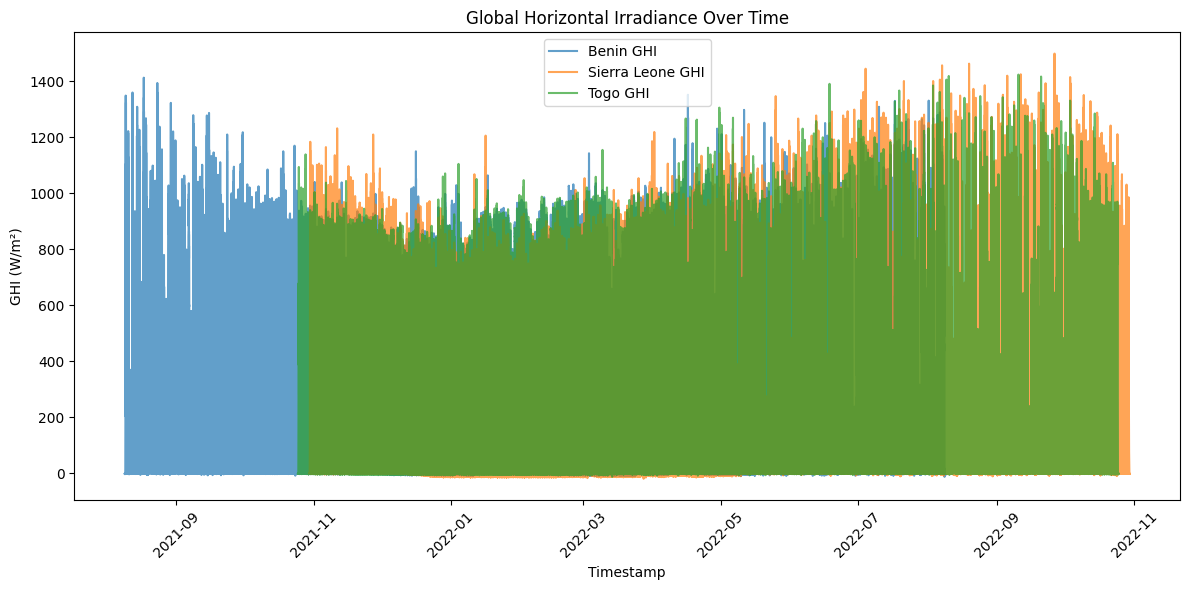

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(benin_df['Timestamp'], benin_df['GHI'], label='Benin GHI', alpha=0.7)
plt.plot(sl_df['Timestamp'], sl_df['GHI'], label='Sierra Leone GHI', alpha=0.7)
plt.plot(tg_df['Timestamp'], tg_df['GHI'], label='Togo GHI', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.title('Global Horizontal Irradiance Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation heatmap for Benin

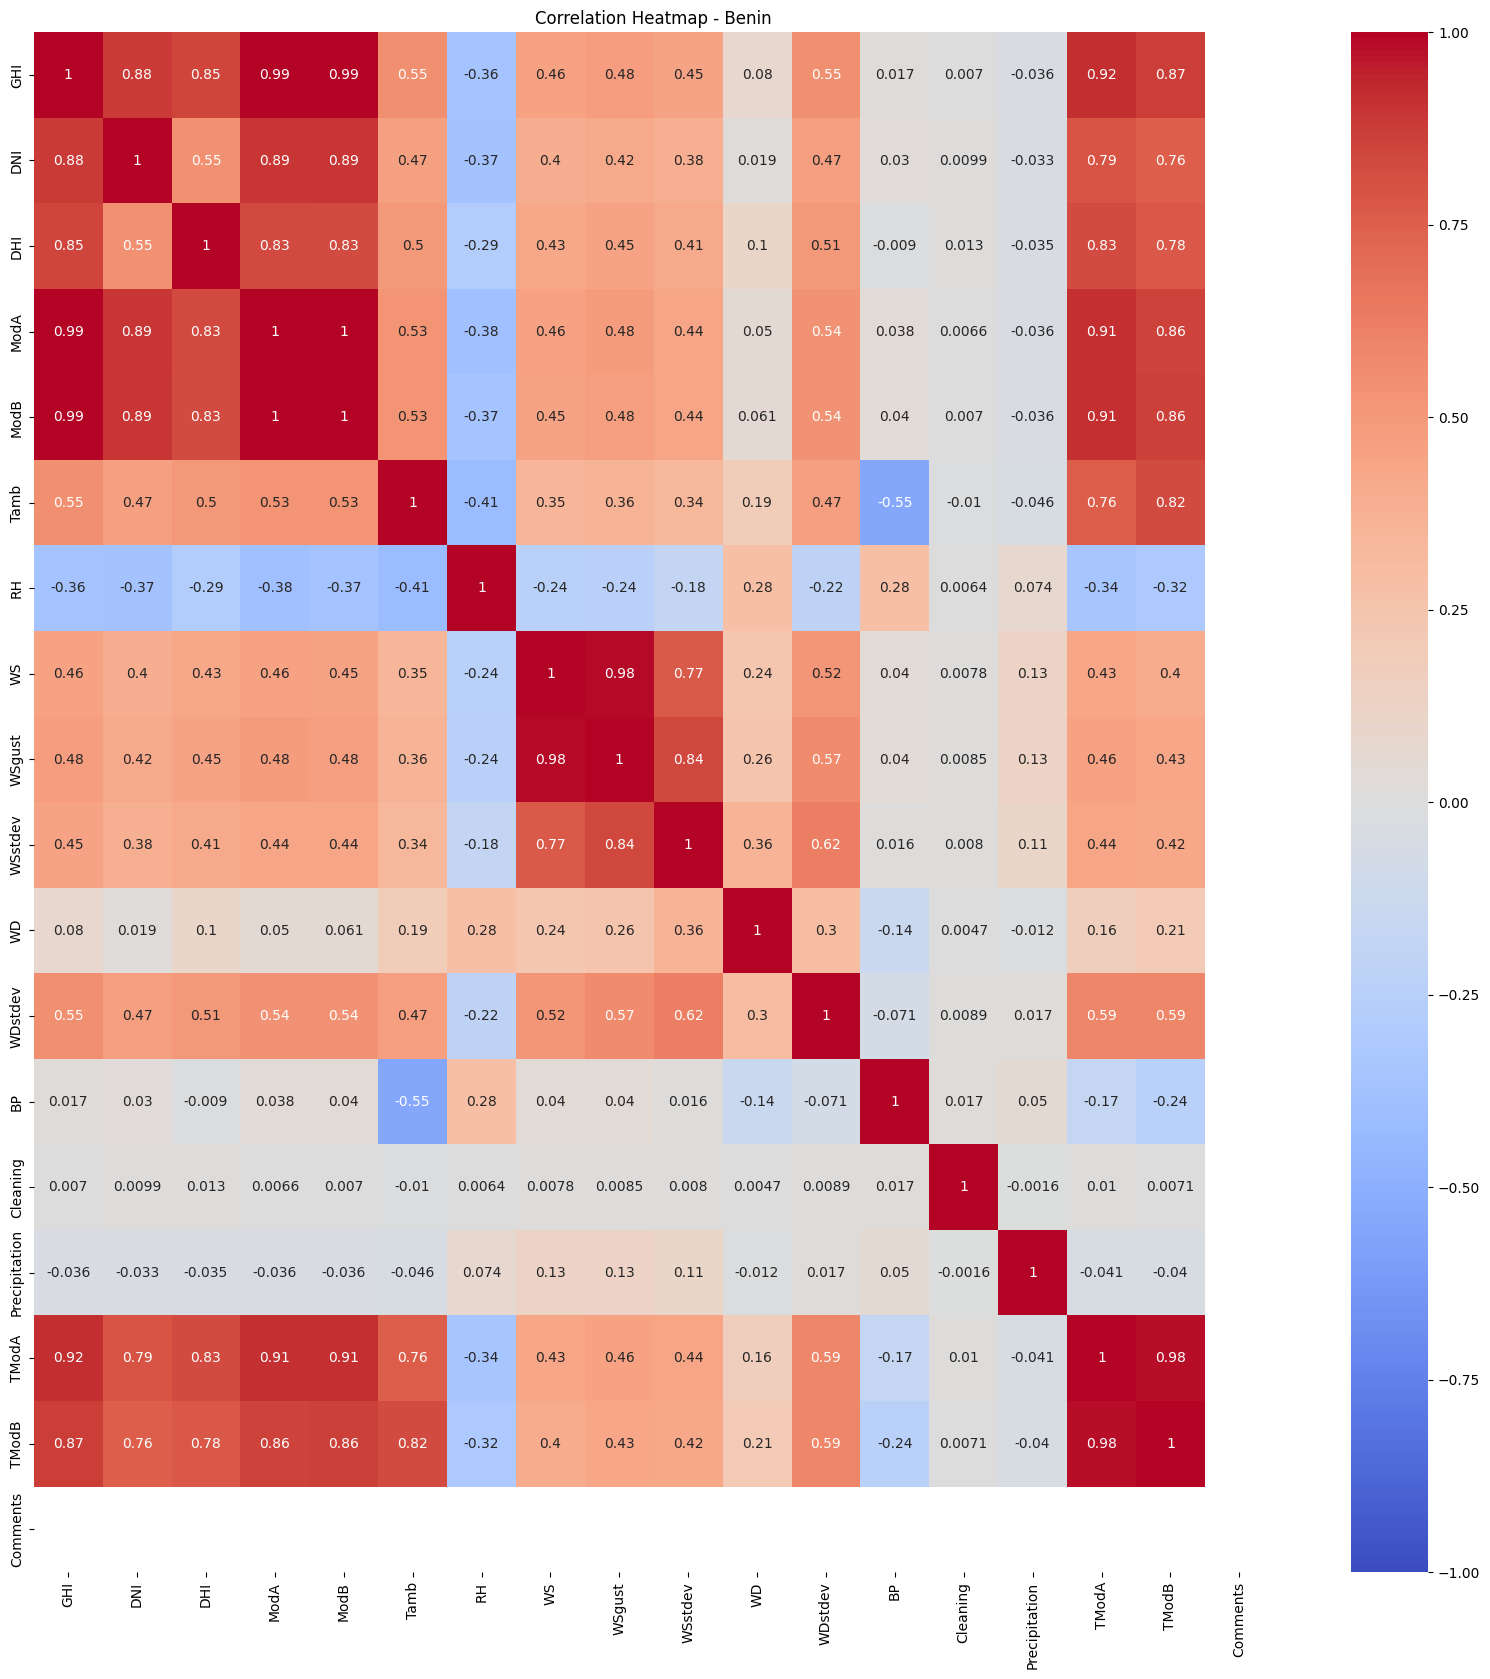

In [14]:
numeric_cols = benin_df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 20))
sns.heatmap(benin_df[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap - Benin')
plt.show()

In [ ]:
## Correlation heatmap for Sierra Leone